<a href="https://colab.research.google.com/github/Prabhitha/FaceEmotionRecognition/blob/main/FaceEmotionRecognition_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Emotion Recognition

In [9]:
# Importing the libraries

import os
import cv2
import glob
import numpy as np
from time import sleep
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array

In [10]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [11]:
# Loading the input data

num_classes = 5
img_rows,img_cols = 48,48
batch_size = 32

train_data_dir = 'drive/My Drive/Face Emotion Recognition/train'
validation_data_dir = 'drive/My Drive/Face Emotion Recognition/validation'

In [ ]:
# Printing the total number of training images

surprise = [cv2.imread(file) for file in glob.glob(r"drive/My Drive/Face Emotion Recognition/train/surprise/*.jpg")]
sad = [cv2.imread(file) for file in glob.glob(r"drive/My Drive/Face Emotion Recognition/train/sad/*.jpg")]
neutral = [cv2.imread(file) for file in glob.glob(r"drive/My Drive/Face Emotion Recognition/train/neutral/*.jpg")]
happy = [cv2.imread(file) for file in glob.glob(r"drive/My Drive/Face Emotion Recognition/train/happy/*.jpg")]
angry = [cv2.imread(file) for file in glob.glob(r"drive/My Drive/Face Emotion Recognition/train/angry/*.jpg")]
print("Total no. of training images: ", len(surprise)+len(sad)+len(neutral)+len(happy)+len(angry))

Total no. of training images:  11448


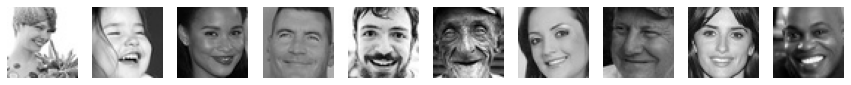

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(15,15))

# view train images
for i in range(10):
    # plot image
    ax[i].imshow(cv2.cvtColor(happy[i], cv2.COLOR_BGR2RGB))
    ax[i].axis('off')

In [ ]:
# Printing the total number of validation images

surprise_val = [cv2.imread(file) for file in glob.glob(r"drive/My Drive/Face Emotion Recognition/validation/surprise/*.jpg")]
sad_val = [cv2.imread(file) for file in glob.glob(r"drive/My Drive/Face Emotion Recognition/train/validation/*.jpg")]
neutral_val = [cv2.imread(file) for file in glob.glob(r"drive/My Drive/Face Emotion Recognition/validation/neutral/*.jpg")]
happy_val = [cv2.imread(file) for file in glob.glob(r"drive/My Drive/Face Emotion Recognition/validation/happy/*.jpg")]
angry_val = [cv2.imread(file) for file in glob.glob(r"drive/My Drive/Face Emotion Recognition/validation/angry/*.jpg")]
print("Total no. of validation images: ", len(surprise_val)+len(sad_val)+len(neutral_val)+len(happy_val)+len(angry_val))

Total no. of validation images:  4798


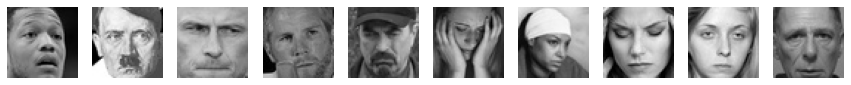

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(15,15))

# view validation images
for i in range(10):
    # plot image
    ax[i].imshow(cv2.cvtColor(sad[i], cv2.COLOR_BGR2RGB))
    ax[i].axis('off')

In [ ]:
print("The size of each image is: ", happy[0].shape)

The size of each image is:  (48, 48, 3)


In [12]:
# Data Augmentation

train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					width_shift_range=0.4,
					height_shift_range=0.4,
					horizontal_flip=True,
					fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(img_rows,img_cols),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(img_rows,img_cols),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)

Found 11448 images belonging to 5 classes.
Found 5937 images belonging to 5 classes.


In [13]:
# Train the model

model = Sequential()

# Block-1

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-2 

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-3

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-4 

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-5

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-6

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-7

model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 activation_11 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_10 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 activation_12 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_11 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                     

### Train the model 

We are going to train our model with Early stopping point (when the validation loss doesn't change for 3 continuous Epochs we will stop the training) and also we are reducing the Learning rate on plateau when it doesn't change for 3 consecutive Epochs.

In [ ]:
checkpoint = ModelCheckpoint('drive/My Drive/Face Emotion Recognition/Emotion_vgg.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop,checkpoint,reduce_lr]

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

nb_train_samples = 11448
nb_validation_samples = 5937
epochs=25

history=model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=nb_validation_samples//batch_size)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/25
357/357 [==============================] - ETA: 0s - loss: 1.8829 - accuracy: 0.3303
Epoch 00001: val_loss improved from inf to 1.88111, saving model to drive/My Drive/Face Emotion Recognition/Emotion_vgg.h5
357/357 [==============================] - 2987s 8s/step - loss: 1.8829 - accuracy: 0.3303 - val_loss: 1.8811 - val_accuracy: 0.2296 - lr: 0.0010
Epoch 2/25
357/357 [==============================] - ETA: 0s - loss: 1.4724 - accuracy: 0.4146
Epoch 00002: val_loss did not improve from 1.88111
357/357 [==============================] - 60s 169ms/step - loss: 1.4724 - accuracy: 0.4146 - val_loss: 1.9543 - val_accuracy: 0.2365 - lr: 0.0010
Epoch 3/25
357/357 [==============================] - ETA: 0s - loss: 1.3733 - accuracy: 0.4630
Epoch 00003: val_loss did not improve from 1.88111
357/357 [==============================] - 61s 171ms/step - loss: 1.3733 - accuracy: 0.4630 - val_loss: 1.9647 - val_accuracy: 0.2416 - lr: 0.0010
Epoch 4/25
357/357 [===========================

Since the above model didn't perform well, we are going to train the model by removing the Early stopping point and reducing the learning rate on plateau.

In [14]:
checkpoint = ModelCheckpoint('drive/My Drive/Face Emotion Recognition/Emotion_vgg1.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

nb_train_samples = 11448
nb_validation_samples = 5937
epochs=25

history=model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                callbacks=checkpoint,
                validation_data=validation_generator,
                validation_steps=nb_validation_samples//batch_size)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/25
357/357 [==============================] - ETA: 0s - loss: 1.8006 - accuracy: 0.3288
Epoch 00001: val_loss improved from inf to 1.80699, saving model to drive/My Drive/Face Emotion Recognition/Emotion_vgg1.h5
357/357 [==============================] - 85s 233ms/step - loss: 1.8006 - accuracy: 0.3288 - val_loss: 1.8070 - val_accuracy: 0.2162
Epoch 2/25
357/357 [==============================] - ETA: 0s - loss: 1.4368 - accuracy: 0.4312
Epoch 00002: val_loss did not improve from 1.80699
357/357 [==============================] - 82s 231ms/step - loss: 1.4368 - accuracy: 0.4312 - val_loss: 1.9117 - val_accuracy: 0.2008
Epoch 3/25
357/357 [==============================] - ETA: 0s - loss: 1.3635 - accuracy: 0.4707
Epoch 00003: val_loss did not improve from 1.80699
357/357 [==============================] - 82s 231ms/step - loss: 1.3635 - accuracy: 0.4707 - val_loss: 1.9034 - val_accuracy: 0.2338
Epoch 4/25
357/357 [==============================] - ETA: 0s - loss: 1.3381 - accur

Here again, we are going to train the model by removing the Early stopping point but by reducing the learning rate on plateau.

In [15]:
checkpoint = ModelCheckpoint('drive/My Drive/Face Emotion Recognition/Emotion_vgg2.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=4,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [checkpoint,reduce_lr]

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

nb_train_samples = 11448
nb_validation_samples = 5937
epochs=25

history=model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=nb_validation_samples//batch_size)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/25
357/357 [==============================] - ETA: 0s - loss: 0.9725 - accuracy: 0.6511
Epoch 00001: val_loss improved from inf to 1.23320, saving model to drive/My Drive/Face Emotion Recognition/Emotion_vgg2.h5
357/357 [==============================] - 69s 189ms/step - loss: 0.9725 - accuracy: 0.6511 - val_loss: 1.2332 - val_accuracy: 0.5495 - lr: 0.0010
Epoch 2/25
357/357 [==============================] - ETA: 0s - loss: 0.9739 - accuracy: 0.6475
Epoch 00002: val_loss improved from 1.23320 to 1.13977, saving model to drive/My Drive/Face Emotion Recognition/Emotion_vgg2.h5
357/357 [==============================] - 68s 190ms/step - loss: 0.9739 - accuracy: 0.6475 - val_loss: 1.1398 - val_accuracy: 0.5628 - lr: 0.0010
Epoch 3/25
357/357 [==============================] - ETA: 0s - loss: 0.9654 - accuracy: 0.6509
Epoch 00003: val_loss did not improve from 1.13977
357/357 [==============================] - 69s 193ms/step - loss: 0.9654 - accuracy: 0.6509 - val_loss: 1.2623 - va